In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [19]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [21]:
df["parental_education_level"] = df["parental_education_level"].fillna(df["parental_education_level"].mode().iloc[0])

df['age'].skew(): 0.0084371397444062


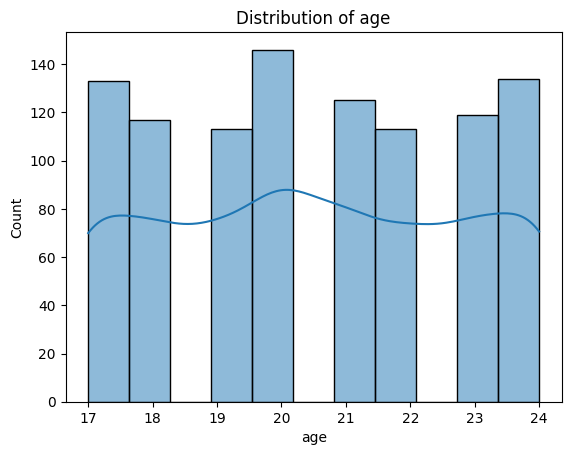

df['study_hours_per_day'].skew(): 0.05425310140811603


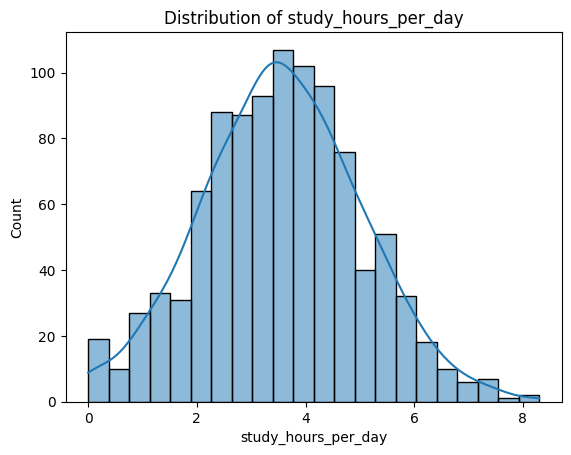

df['social_media_hours'].skew(): 0.11980520318308562


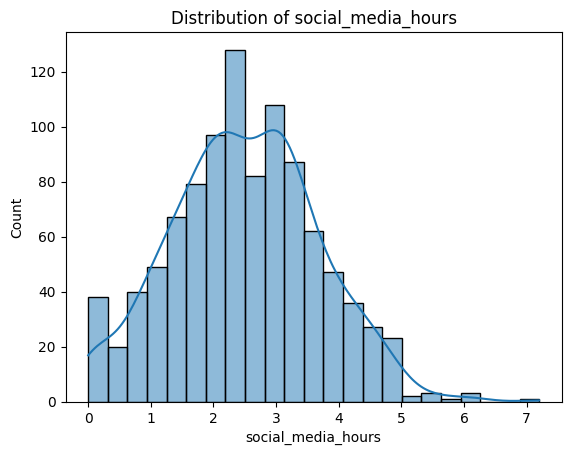

df['netflix_hours'].skew(): 0.23715439564540441


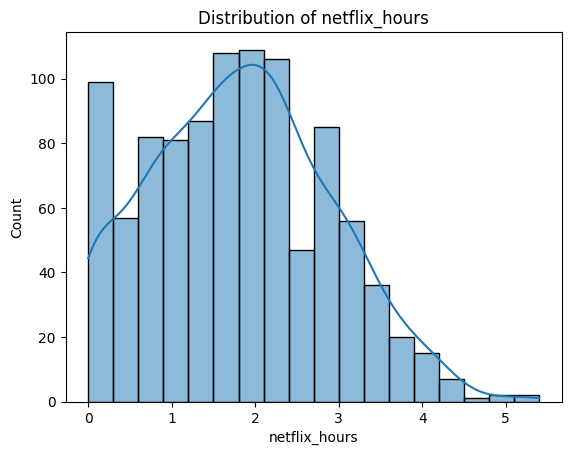

df['attendance_percentage'].skew(): -0.23781042684597256


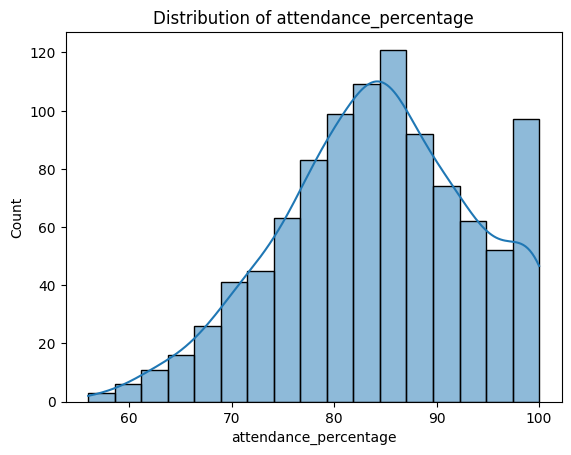

df['sleep_hours'].skew(): 0.09148397227093791


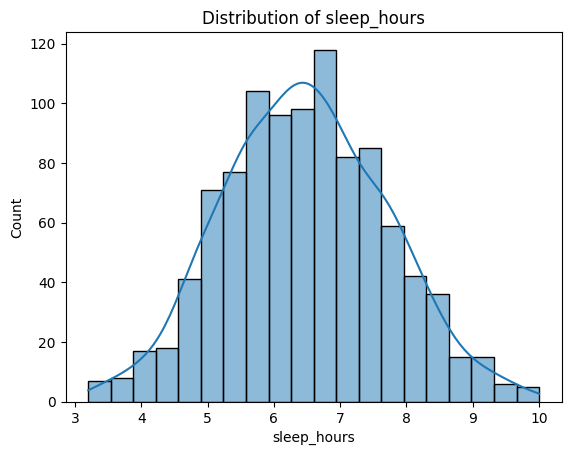

df['exercise_frequency'].skew(): -0.03192297249384373


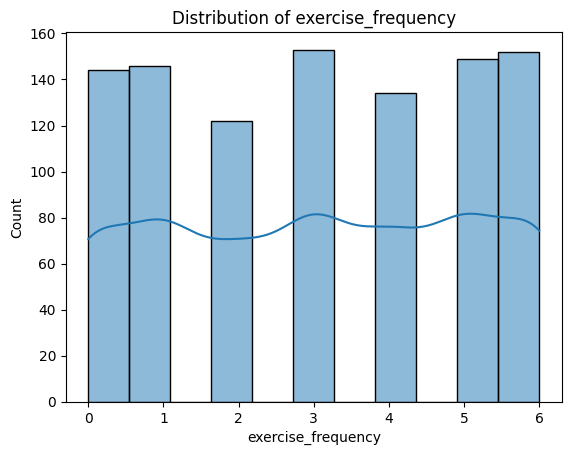

df['mental_health_rating'].skew(): 0.037810699888038285


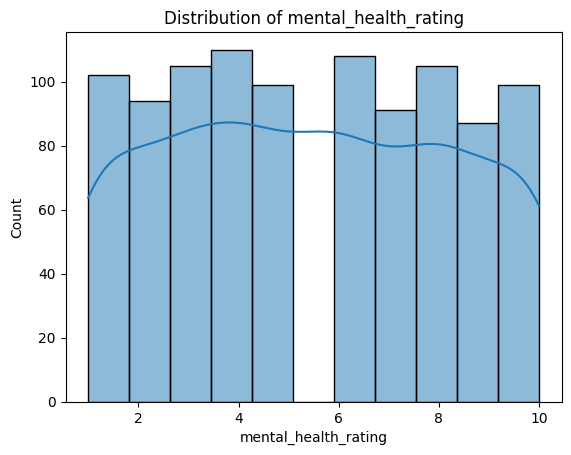

df['exam_score'].skew(): -0.15635065547132798


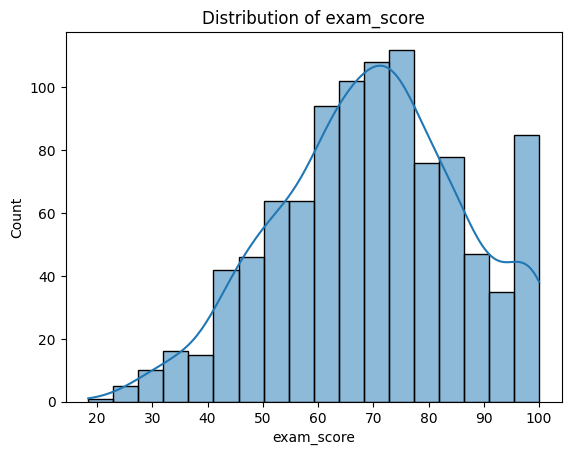

In [22]:
for col in df.select_dtypes(include=['number']).columns:
    print(f"df['{col}'].skew(): {df[col].skew()}")
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [23]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")
    print(df[col].value_counts())

Unique values in 'student_id': 1000
student_id
S1000    1
S1671    1
S1658    1
S1659    1
S1660    1
        ..
S1338    1
S1339    1
S1340    1
S1341    1
S1999    1
Name: count, Length: 1000, dtype: int64
Unique values in 'gender': 3
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
Unique values in 'part_time_job': 2
part_time_job
No     785
Yes    215
Name: count, dtype: int64
Unique values in 'diet_quality': 3
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
Unique values in 'parental_education_level': 3
parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64
Unique values in 'internet_quality': 3
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
Unique values in 'extracurricular_participation': 2
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


In [24]:
df["part_time_job"] = df["part_time_job"].astype(bool)
df["extracurricular_participation"] = df["extracurricular_participation"].astype(bool)

In [25]:
df["internet_quality"] = df["internet_quality"].map({"Poor": 1, "Average": 2, "Good": 3}).astype(int)
df["parental_education_level"] = df["parental_education_level"].map({"High School": 1, "Bachelor": 2, "Master": 3}).astype(int)
df["diet_quality"] = df["diet_quality"].map({"Poor": 1, "Good": 2, "Fair": 3}).astype(int)


In [26]:
df.drop(columns=['student_id'], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   bool   
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   int32  
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   int32  
 11  internet_quality               1000 non-null   int32  
 12  mental_health_rating           1000 non-null   in

In [28]:
df = pd.get_dummies(df, columns=["gender"])
df.drop(columns=["gender_Other"], inplace=True)
df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Female,gender_Male
0,23,0.0,1.2,1.1,True,85.0,8.0,3,6,3,2,8,True,56.2,True,False
1,20,6.9,2.8,2.3,True,97.3,4.6,2,6,1,2,8,True,100.0,True,False
2,21,1.4,3.1,1.3,True,94.8,8.0,1,1,1,1,1,True,34.3,False,True
3,23,1.0,3.9,1.0,True,71.0,9.2,1,4,3,3,1,True,26.8,True,False
4,19,5.0,4.4,0.5,True,90.9,4.9,3,3,3,3,1,True,66.4,True,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   study_hours_per_day            1000 non-null   float64
 2   social_media_hours             1000 non-null   float64
 3   netflix_hours                  1000 non-null   float64
 4   part_time_job                  1000 non-null   bool   
 5   attendance_percentage          1000 non-null   float64
 6   sleep_hours                    1000 non-null   float64
 7   diet_quality                   1000 non-null   int32  
 8   exercise_frequency             1000 non-null   int64  
 9   parental_education_level       1000 non-null   int32  
 10  internet_quality               1000 non-null   int32  
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   bo

In [30]:
scaler = StandardScaler()
for col in df.select_dtypes(include=['number']).columns:
    df[col] = scaler.fit_transform(df[[col]])

Text(0.5, 1.0, 'Correlation Matrix')

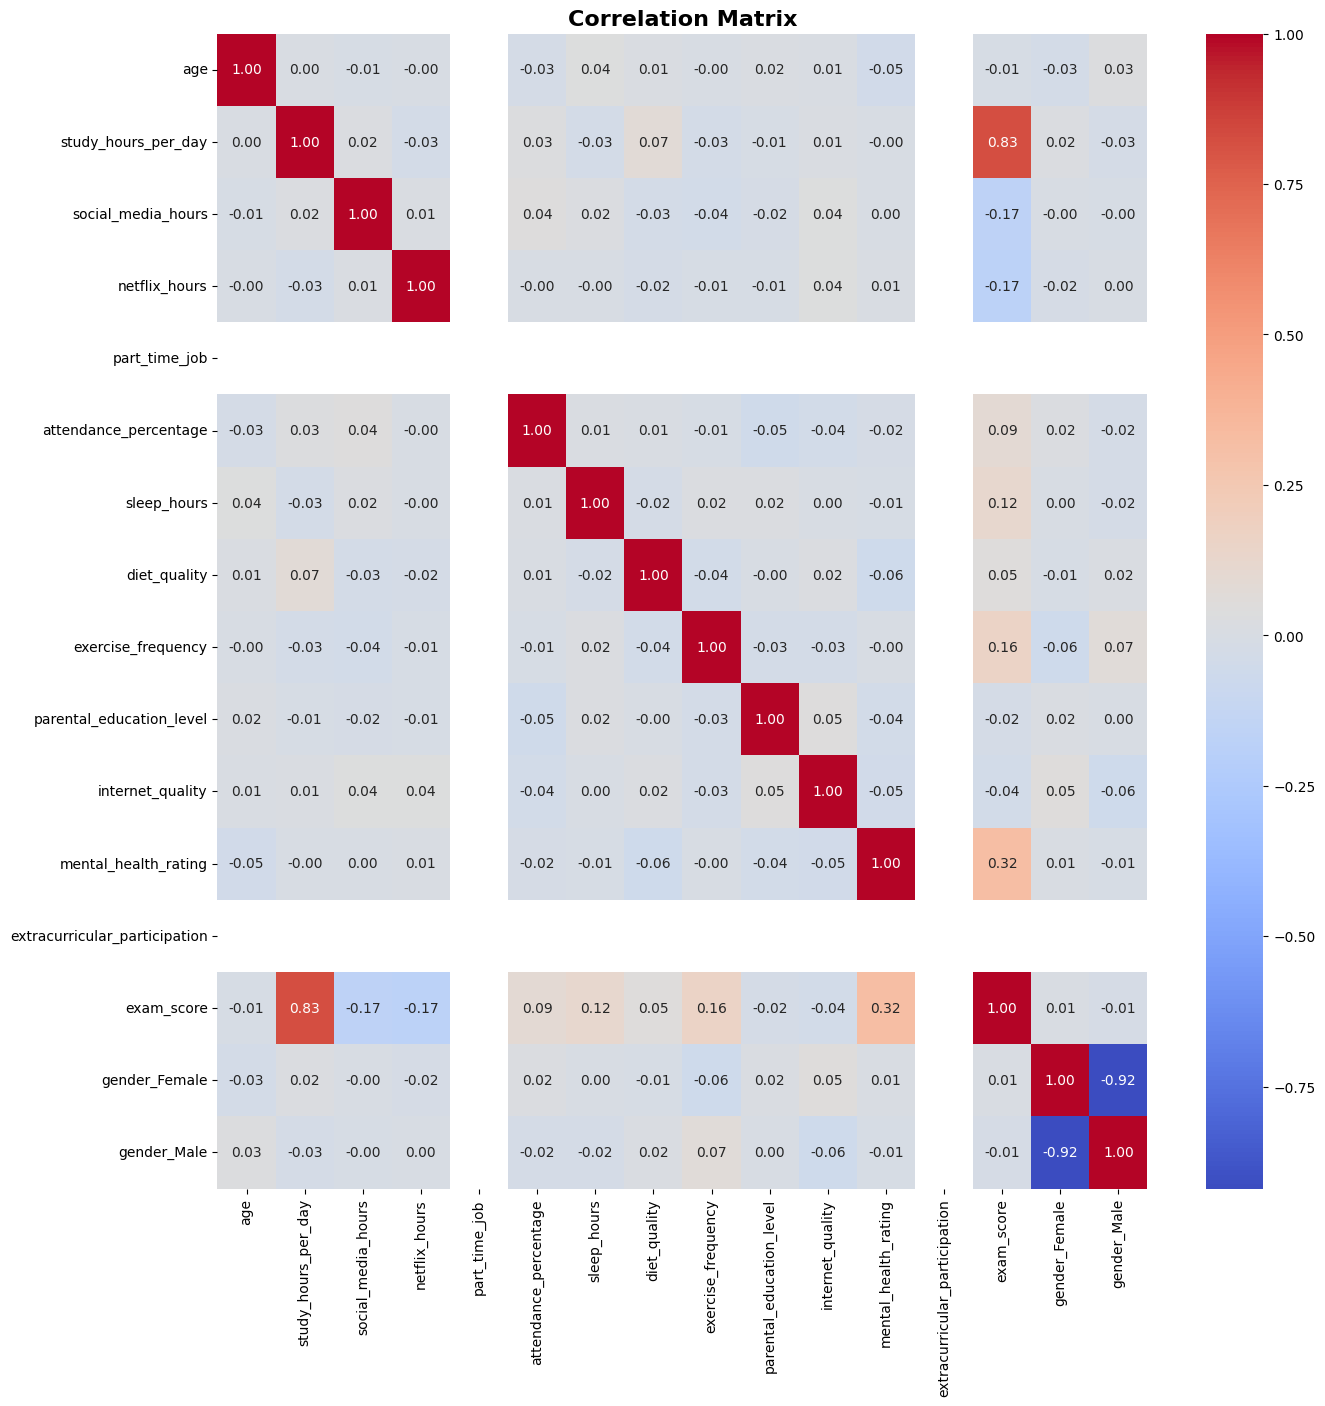

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')

In [32]:
X = df.drop(columns=["exam_score"])
y = df["exam_score"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=500, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, random_state=42)
}

In [38]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R² Score: {r2:.4f}")

Linear Regression R² Score: 0.8980
Ridge Regression R² Score: 0.8980
Lasso Regression R² Score: 0.8279
Random Forest R² Score: 0.8512
XGBoost R² Score: 0.8430
